# FIN 514 - PS3 Q1 CRR
**Spring 2021**

This notebook provides the graphs for PS3 Q1 for the CRR model

## Packages and Configurations

The following common packages will be use on this notebook.

* numpy - [https://numpy.org/](https://numpy.org/)
* Pandas - [https://pandas.pydata.org/](https://pandas.pydata.org/)
* matplotlib - [https://matplotlib.org/](https://matplotlib.org/)
* Scipy Statistical functions - [https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# ENTER INPUT FOR: start_step

start_step = 100

In [3]:
# ENTER INPUT FOR: N = num_steps

N = 100

In [4]:
# ENTER INPUT FOR: S0 = Original Stock Price

S0 = 100.0

In [5]:
# ENTER INPUT FOR: K = Excercise Price of Call Option

K = 105

In [6]:
# ENTER INPUT FOR: sigma = Annualized (Future) Volatility of Stock Price Returns

sigma = 0.2

In [7]:
# ENTER INPUT FOR: r = Annualized Continously Compounded Risk-free Rate

r = 0.01

In [8]:
# ENTER INPUT FOR: T = Time Length of Option in which to Exercise (In Years)

T = 0.5

In [9]:
# ENTER INPUT FOR: q = Rate of continuous dividend paying asset 

q = 0

## Binomial Model Function

In [10]:

def CRRA_model(S0, K, T, r, sigma, start_step, N):
    """
    Function to calculates the value of a European Put Option using the CRR Binomial Model 
    
    S0: Original Stock Price
    K: Excercise Price of Call Option
    T: Time Length of Option in which to Exercise (In Years)
    r: Annualized Continously Compounded Risk-free Rate
    sigma: Annualized (Future) Volatility of Stock Price Returns
    start_step: Starting time step
    N: Number of time steps
    
    """    
    
    # LIST TO SAVE RESULTS
    crrexb_result = []
        
    # CREATE TWO DIMENSIONAL ARRAY OF SIZE [N+1,N+1] TO STORE ALL STEPS
    option_value = np.zeros([N+1, N+1])
    stock_value = np.zeros([N+1, N+1])    
    ex_boundary = np.zeros([N+1])
    
    # FOR LOOP STATEMENT: For a Binomial Tree from start_step to N
    for n in range(start_step, N+1):
        delta = T / n
        u = np.exp(sigma * (delta)**0.5)
        d = 1 / u
        qu = (np.exp(r * delta) - d) / (u - d)
        qd = 1 - qu
        
    # CALCULATE OPTION VALUES AT CERTAIN STEPS AND POSITIONS WITHIN THE BINOMIAL TREE:
        j = n 
        ex_boundary[j] = K
        output = {'time': j*delta, 'Boundary': ex_boundary[j]}
        crrexb_result.append(output)
        for i in range(0, j):    
            stock_value[j, i] = S0 * (u**i) * (d**(j - i))
            option_value[j, i] = np.maximum(K - stock_value[j, i], 0)

        for j in range(n-1, -1, -1):
            ex_boundary[j] = 0
            for i in range(0, j+1, 1):  
                stock_value[j, i] = S0 * (u**i) * (d**(j - i))
                pv = np.exp(-r * delta) * (qu * option_value[j + 1, i + 1] + qd * option_value[j + 1, i])
                if (pv < K - stock_value[j, i]):
                    ex_boundary[j] = stock_value[j, i]
                option_value[j, i] = np.maximum(pv, K - stock_value[j, i])
    # RELAY OUTPUTS TO DICTIONARY
            output = {'time': j*delta, 'Boundary': ex_boundary[j]}
            crrexb_result.append(output)

    return crrexb_result


In [11]:
crr = CRRA_model(S0, K, T, r, sigma, start_step, N)

In [12]:
# CREATE A DATAFRAME FROM THE BINOMIAL MODEL OUTPUT
df = pd.DataFrame.from_dict(crr)

In [13]:
# INSPECT THE FIRST ROWS OF THE DATAFRAME
df.head()

,time,Boundary
0,0.500,105.000000
1,0.495,101.424261
2,0.490,100.000000
3,0.485,98.595739
4,0.480,97.211198


In [14]:
# INSPECT THE LAST ROWS OF THE DATAFRAME
df.tail()

,time,Boundary
96,0.020,0.0
97,0.015,0.0
98,0.010,0.0
99,0.005,0.0
100,0.000,0.0


In [16]:
# EXPORT THE DATA TO A CSV FILE
df.to_csv("Data/Q1crrexb.csv", index=False)

### Binomial Model Exercise Boundary

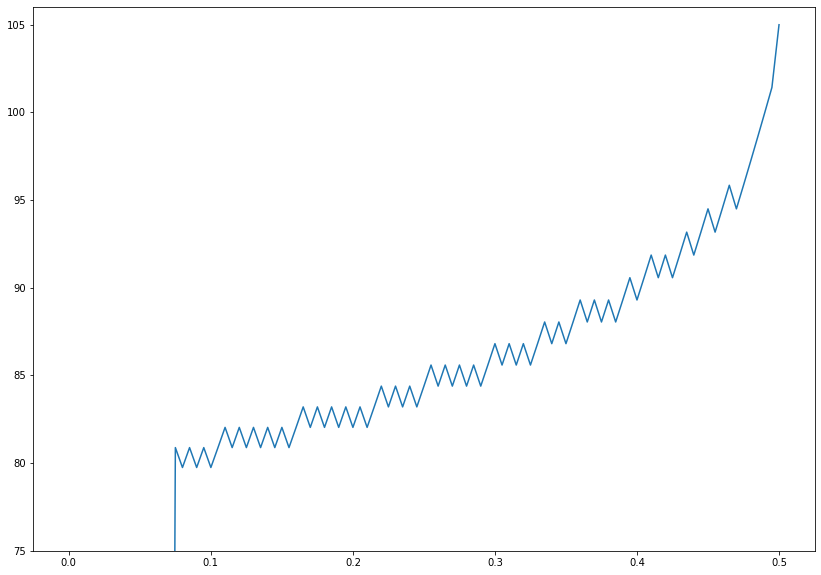

In [17]:
plt.figure(figsize=(14,10))
plt.ylim(75,106)
plt.plot(df['time'], df['Boundary'], markersize=3)
plt.savefig('Images/Q2_crrexb.png')
plt.show()